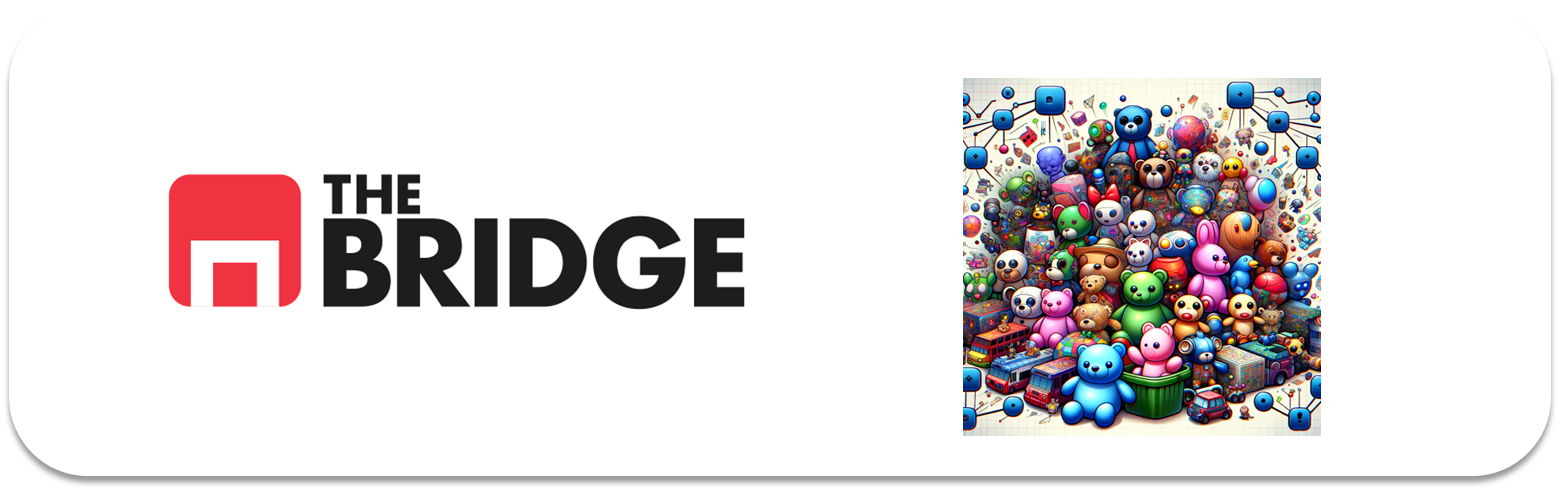

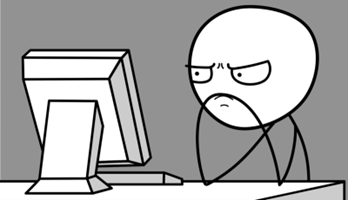

## PRACTICA OBLIGATORIA: K-MEANS

* La pr√°ctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre im√°genes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendr√°s que descar los directorios de im√°genes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesi√≥n en vivo para que punt√∫e adecuadamente.  
* Recuerda tambi√©n que no es necesario que est√© perfecta, s√≥lo es necesario que se vea el esfuerzo. 
* Esta pr√°ctica se resolver√° en la sesi√≥n en vivo correspondiente y la soluci√≥n se publicar√° en el repo del curso. 

### Ejercicio 0

Importa los paquetes y m√≥dulos que necesites a lo largo del notebook

In [3]:
# Basis-Pakete
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bildverarbeitung
import cv2  # OpenCV f√ºr Bildverarbeitung
from skimage.io import imread, imshow  # Alternative zu OpenCV f√ºr das Laden und Anzeigen von Bildern

# K-Means Clustering aus Scikit-Learn
from sklearn.cluster import KMeans

# Sonstige n√ºtzliche Funktionen
import os  # F√ºr die Handhabung von Dateipfaden


## **#1**

Vamos a trabajar con un dataset tambi√©n entre los "cl√°sicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 im√°genes en escala de grises de 64 √ó 64 p√≠xeles de rostros.   


Como en otros datasets de im√°genes, est√°s est√°n "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotograf√≠as se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qu√© persona est√° representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la funci√≥n `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripci√≥n acudiendo a la clave "DESCR".

In [4]:
# Importieren der notwendigen Bibliotheken
from sklearn.datasets import fetch_olivetti_faces

# Laden des Olivetti Faces Datensatzes
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Anzeigen der Beschreibung des Datensatzes
print(faces['DESCR'])


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\kthfu\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for

### #1.2 

Aunque no lo vas a usar hasta el final de la pr√°ctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendr√°s que a√±adir el target) y obt√©n otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el m√©todo `sample` del dataframe o el m√©todo que t√∫ quieras)

In [5]:
import pandas as pd

# Anzeigen der Zielwerte (Labels)
print("Target-Werte:\n", faces.target)

# Erstellen eines DataFrames mit den Bilddaten (flattened) und den Labels
df_faces = pd.DataFrame(faces.data)  # Die Bilddaten (4096 Features pro Bild)
df_faces['target'] = faces.target    # Die Zielwerte hinzuf√ºgen

# Zuf√§lliges Mischen des DataFrames
df_faces_shuffled = df_faces.sample(frac=1, random_state=42).reset_index(drop=True)

# Anzeige der ersten 5 Zeilen des gemischten DataFrames
df_faces_shuffled.head()


Target-Werte:
 [20 28  3 21  9  8 32  9 26 12  0 36  5  7 13  4 27 37 23 38  7  1 39 27
  0 39 11 22 26 10 39 19 26  5 23 11 11 34 15 14 38  5  7  2  8 38 14 18
  2 17  4 32 33  7 37  3 22 17  3 15 12 29 25  7 10  3 35 26 39  7 32 14
  0  4 38 24 22 36 17 28  0  1 20 25 27  6 24 30 10  9 23 33 11 22 18 31
 37 38 23  7 24 11  1  6 15  0  1 13 35 34 13 38 29 38 29  6  7 28 30 28
 15 10  1 34  2 17 35 33 16 24 31 14 25 17 11 19 22 26 21 30  3 13 29 15
 19 28  5 11 16 36  0 33 27 15  1 19 10  8 31 39 37 20 28 16 35  8 37 16
 14 22  9  6 12  9 14 32  9 23  6  2  3 14 12 18  6 19 32 21 31 19 12 14
 37  8 33 34 33 35 33 30 18 20 28 21 28 12  3  1 32 18 22 11 17 32 29 11
 36 27 38 28 36 16 25 13 15 19 19 39  0 20 11 23 23  2 12 35 22 36 37 35
 37 12  7 32  2  8 38 10 24 29 13 24 18 29  4 36  6  8 24 18 15  1  3  2
 17 14 31 27 22  9  5 24 29 30 17  4 31 20 25 33  0 25 35 10 22 34 21 17
  9 21  6  4  3 26 20 35  2 31 23 26 28 16 37 13  6 13 12  0  6 30  1 15
  4 36 32 21 27 34 23 20 21 29 36 25

0         1         2         3         4         5         6  \
0  0.252066  0.231405  0.276859  0.417355  0.433884  0.669421  0.834711   
1  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
2  0.723140  0.710744  0.714876  0.731405  0.735537  0.752066  0.772727   
3  0.652893  0.690083  0.677686  0.690083  0.714876  0.743802  0.747934   
4  0.409091  0.590909  0.657025  0.681818  0.694215  0.731405  0.760331   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.859504  0.871901  0.871901  ...  0.508264  0.268595  0.140496  0.165289   
1  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   
2  0.793388  0.814050  0.834711  ...  0.904959  0.549587  0.409091  0.491736   
3  0.735537  0.710744  0.681818  ...  0.152893  0.140496  0.086777  0.111570   
4  0.785124  0.776860  0.785124  ...  0.276859  0.314050  0.268595  0.247934   

       4091      4092      4093      4094      4095  target  
0  0.169421  0.173554  0.181818  0.173554  0.177686      18  
1  0.177686  0.177686  0.177686  0.173554  0.173554       0  
2  0.487603  0.471074  0.483471  0.475207  0.475207       5  
3  0.173554  0.243802  0.223140  0.260331  0.309917      22  
4  0.256198  0.264463  0.252066  0.276859  0.285124      22  

[5 rows x 4097 columns]

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aqu√≠ lo hacemos para poder comparar posteriormente el clustering con la clasificaci√≥n (ya que es uan pr√°ctica formativa).

Por tanto, div√≠delo en un conjunto de entrenamiento, un conjunto de validaci√≥n y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante peque√±o, emplea un muestreo estratificado para asegurarse de que haya el mismo n√∫mero de im√°genes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separaci√≥n en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los n√∫meros aproximados), por ejemplo.

In [6]:
from sklearn.model_selection import train_test_split

# Erster Split: 80% Training, 20% Test+Validierung (stratifiziert nach 'target')
X_train, X_temp, y_train, y_temp = train_test_split(
    df_faces_shuffled.drop(columns=['target']),  # Merkmale
    df_faces_shuffled['target'],                 # Zielwerte
    test_size=0.2, 
    stratify=df_faces_shuffled['target'], 
    random_state=42
)

# Zweiter Split: 10% Validierung, 10% Test (aus den verbleibenden 20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    stratify=y_temp, 
    random_state=42
)

# Ausgabe der Datengr√∂√üen zur Kontrolle
print(f"Trainingsdaten: {X_train.shape}, Targets: {y_train.shape}")
print(f"Validierungsdaten: {X_val.shape}, Targets: {y_val.shape}")
print(f"Testdaten: {X_test.shape}, Targets: {y_test.shape}")


Trainingsdaten: (320, 4096), Targets: (320,)
Validierungsdaten: (40, 4096), Targets: (40,)
Testdaten: (40, 4096), Targets: (40,)


In [7]:
import numpy as np

# Pr√ºfen, ob die Targets gleichm√§√üig verteilt sind
print("Trainings-Set Verteilung:", np.bincount(y_train))
print("Validierungs-Set Verteilung:", np.bincount(y_val))
print("Test-Set Verteilung:", np.bincount(y_test))


Trainings-Set Verteilung: [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8]
Validierungs-Set Verteilung: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Test-Set Verteilung: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


### #1.4

Crea los pares X,y para train, validation y test.

In [8]:
# Erstellung der (X, y)-Paare f√ºr Training, Validierung und Test
train_set = (X_train, y_train)
val_set = (X_val, y_val)
test_set = (X_test, y_test)

# √úberpr√ºfung der Shapes
print(f"Trainings-Set: X={train_set[0].shape}, y={train_set[1].shape}")
print(f"Validierungs-Set: X={val_set[0].shape}, y={val_set[1].shape}")
print(f"Test-Set: X={test_set[0].shape}, y={test_set[1].shape}")


Trainings-Set: X=(320, 4096), y=(320,)
Validierungs-Set: X=(40, 4096), y=(40,)
Test-Set: X=(40, 4096), y=(40,)


Utiliza la siguiente funci√≥n para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

In [9]:
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)  # Umwandlung in 64x64-Bilder
    n_rows = (len(faces) // n_cols) + 1  # Berechnung der ben√∂tigten Zeilen

    plt.figure(figsize=(n_cols * 2, n_rows * 2))  # Anpassung der Bildgr√∂√üe

    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")  # Graustufen-Darstellung
        plt.axis("off")  
        plt.title(f"Person {label}")

    plt.show()


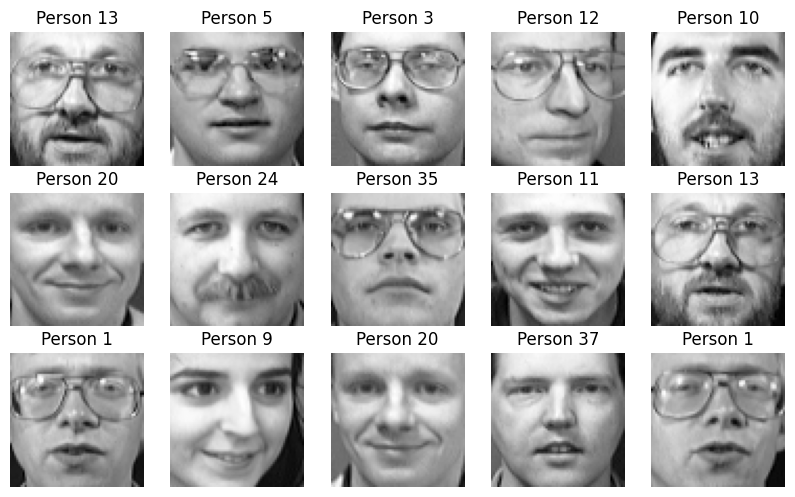

In [10]:
plot_faces(X_train.iloc[:15].values, y_train.iloc[:15], n_cols=5)


### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (t√©cnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisierung der Daten f√ºr PCA (PCA funktioniert besser mit standardisierten Daten)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA mit 99% der Varianz
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Anzahl der Hauptkomponenten anzeigen
print(f"Anzahl der Hauptkomponenten: {pca.n_components_}")


Anzahl der Hauptkomponenten: 220


### 1.6

Aqu√≠ viene la parte del le√≥n. A continuaci√≥n, agrupa las im√°genes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el m√©todo del m√°ximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¬øCu√°l es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya est√°n escaladas entre 0 y 1)

Optimales k: 120 mit Silhouetten-Score: 0.2322


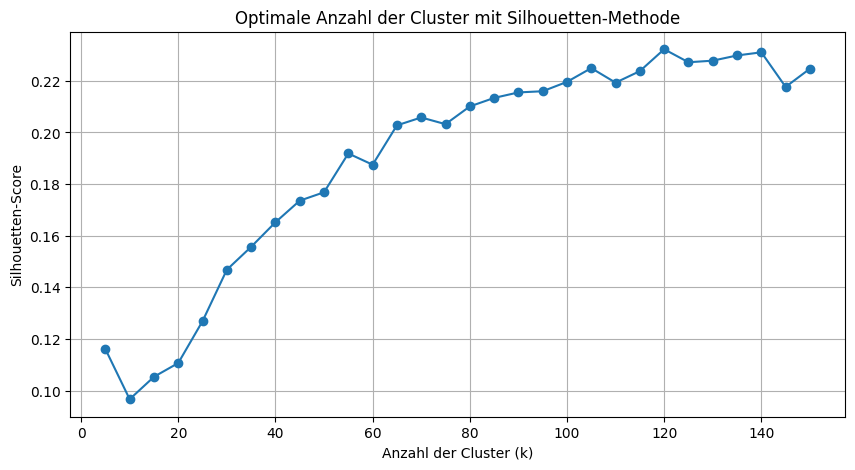

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Werte f√ºr k von 5 bis 150 in 5er-Schritten
k_values = range(5, 151, 5)
silhouette_scores = []

# Iteriere √ºber verschiedene k-Werte und berechne den Silhouetten-Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)  # Cluster-Zuweisung f√ºr Trainingsdaten
    score = silhouette_score(X_train_pca, labels)  # Silhouetten-Score berechnen
    silhouette_scores.append(score)

# Bestes k bestimmen (h√∂chster Silhouetten-Score)
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"Optimales k: {best_k} mit Silhouetten-Score: {best_score:.4f}")

# üìä Visualisierung des Silhouetten-Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Silhouetten-Score")
plt.title("Optimale Anzahl der Cluster mit Silhouetten-Methode")
plt.grid(True)
plt.show()



### #1.7

Repite el ejercio anterior empleando ahora el m√©todo del codo de Inercia. ¬øSale algo m√°s concluyente o que refuerce el anterior resultado?

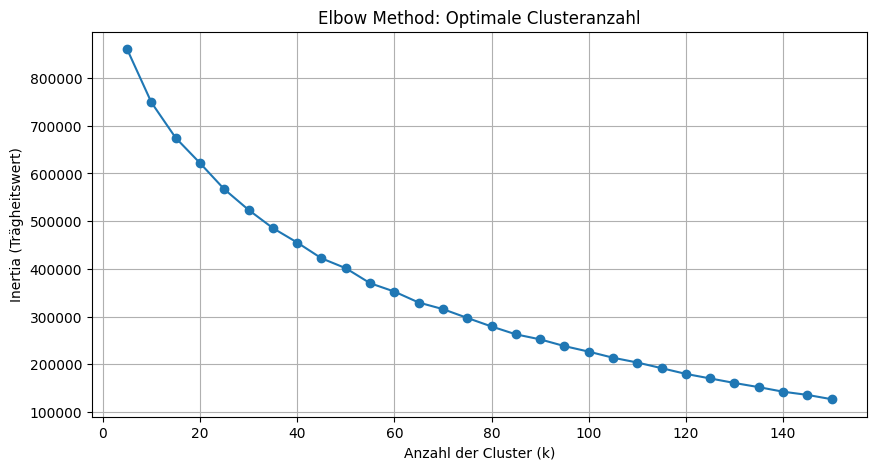

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Werte f√ºr k von 5 bis 150 in 5er-Schritten
k_values = range(5, 151, 5)
inertia_scores = []

# K-Means f√ºr verschiedene k-Werte berechnen und die Inertia (Tr√§gheit) speichern
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)  
    inertia_scores.append(kmeans.inertia_)  # Tr√§gheitswert speichern

# üìä Elbow-Plot f√ºr die Inertia-Methode
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_scores, marker="o", linestyle="-")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Inertia (Tr√§gheitswert)")
plt.title("Elbow Method: Optimale Clusteranzahl")
plt.grid(True)
plt.show()


#  Interpretaci√≥n de los Resultados de Clustering

## **1Ô∏è Silhouette Score**
El primer gr√°fico muestra la evoluci√≥n del **Silhouette Score** en funci√≥n del n√∫mero de clusters (**k**).  
- El **m√°ximo valor** del Silhouette Score se encuentra en **k = 120**, con un valor de **0.2322**.
- El Silhouette Score aumenta constantemente hasta este punto, lo que sugiere que **k = 120** es el n√∫mero √≥ptimo de clusters en t√©rminos de cohesi√≥n y separaci√≥n de los grupos.
- Despu√©s de k = 120, el score se mantiene estable o disminuye ligeramente, lo que indica que a√±adir m√°s clusters **no mejora significativamente la calidad del agrupamiento**.

### **Conclusi√≥n del Silhouette Score**
 **k = 120** parece ser la mejor opci√≥n seg√∫n este m√©todo, ya que proporciona la mejor estructura de clusters en t√©rminos de similitud interna.

---

## **2Ô∏è Elbow Method (M√©todo del Codo)**
El segundo gr√°fico representa la **Inercia (Tr√§gheitswert)** en funci√≥n del n√∫mero de clusters.  
- La inercia disminuye a medida que **k** aumenta, lo que significa que los clusters son cada vez m√°s compactos.
- Sin embargo, el punto donde la **tasa de disminuci√≥n se ralentiza** (el "codo") no es tan claro.
- Se observa un cambio m√°s notable en la curva alrededor de **k ‚âà 40-60**, lo que sugiere que podr√≠a ser una opci√≥n razonable en t√©rminos de balance entre reducci√≥n de error y n√∫mero de clusters.

### **Conclusi√≥n del Elbow Method**
 El punto de codo **no es muy pronunciado**, pero parece ubicarse en **k ‚âà 40-60**, lo que podr√≠a indicar un n√∫mero de clusters m√°s peque√±o que el sugerido por el Silhouette Score.

---

## ** Comparaci√≥n de Resultados**
üîπ **Silhouette Score** sugiere que el n√∫mero √≥ptimo de clusters es **k = 120**.  
üîπ **Elbow Method** sugiere un valor menor, aproximadamente **k ‚âà 40-60**.  

 **Recomendaci√≥n Final**:
- Si el objetivo es una **buena separaci√≥n de los grupos**, **k = 120** es la mejor opci√≥n seg√∫n el Silhouette Score.
- Si queremos un n√∫mero de clusters **m√°s manejable y compacto**, podr√≠amos optar por **k = 40-60** bas√°ndonos en el Elbow Method.
- Una posible estrategia ser√≠a probar **ambas opciones** y evaluar los resultados con otros m√©todos de validaci√≥n.

 **La decisi√≥n final depender√° del contexto y del uso pr√°ctico de los clusters en este conjunto de datos.**


### #1.8

Qu√©date con el k obtenido con el m√©todo del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [14]:
from sklearn.cluster import KMeans

# Definiere das finale K-Means-Modell mit k = 120
best_k = 120  # Aus dem Silhouetten-Score-Ergebnis
best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)

# Trainiere das Modell mit den PCA-reduzierten Daten
best_model.fit(X_train_pca)

# Ausgabe der Clusterzentren und Labels zur √úberpr√ºfung
print(f"Cluster-Zentren Shape: {best_model.cluster_centers_.shape}")
print(f"Labels Shape: {best_model.labels_.shape}")


Cluster-Zentren Shape: (120, 220)
Labels Shape: (320,)


### #1.9

Haz una valoraci√≥n del m√©todo de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la funci√≥n que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros cl√∫steres. Ojo tendr√°s que hacer una peque√±a adaptaci√≥n porque las features de entrenamiento no son las features reales (son una "transformaci√≥n" de estas) y si pasas el X de entrenamiento no ver√°s nada. ¬øVes caras similares?

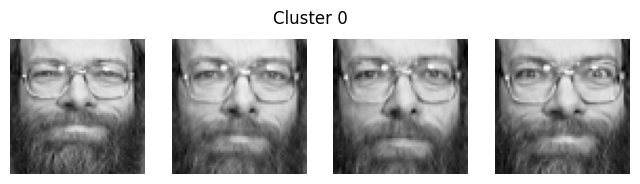

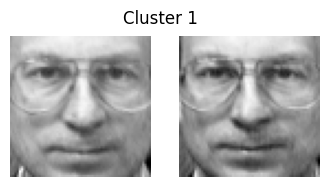

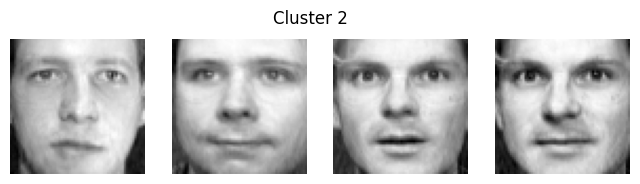

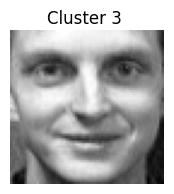

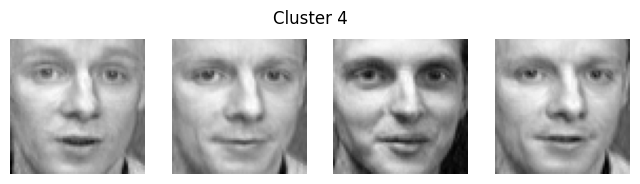

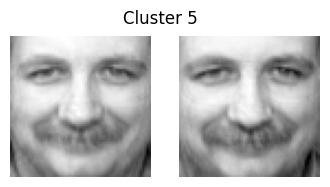

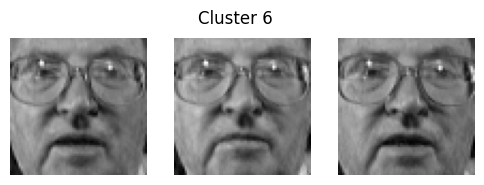

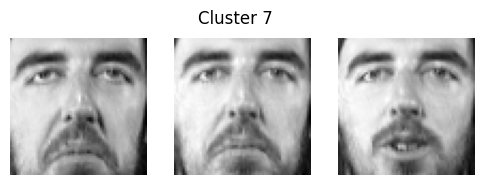

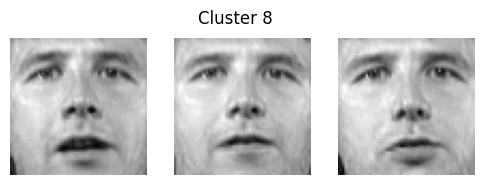

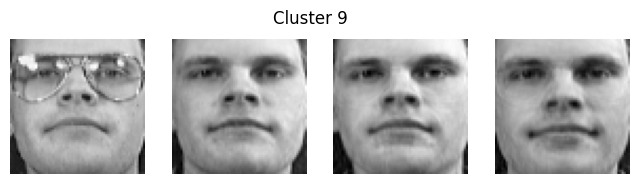

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Funktion zur Visualisierung von Gesichtern in Clustern
def plot_cluster_faces(model, X_pca, original_faces, cluster_num, n_samples=10):
    """Zeigt bis zu `n_samples` Gesichter aus dem Cluster `cluster_num`"""
    cluster_labels = model.labels_
    cluster_indices = np.where(cluster_labels == cluster_num)[0]  # Indizes der Bilder im Cluster

    # Falls zu wenige Bilder im Cluster sind, anpassen
    n_samples = min(len(cluster_indices), n_samples)

    if n_samples == 0:
        print(f"‚ö† Keine Bilder f√ºr Cluster {cluster_num} gefunden.")
        return
    
    # Subplots erzeugen
    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 2, 2))

    # Falls nur ein Bild, `axes` in eine Liste packen
    if n_samples == 1:
        axes = [axes]

    for i, idx in enumerate(cluster_indices[:n_samples]):
        axes[i].imshow(original_faces[idx].reshape(64, 64), cmap="gray")
        axes[i].axis("off")

    plt.suptitle(f"Cluster {cluster_num}")
    plt.show()

# Originalbilder zur√ºckskalieren (Da X_train_pca transformierte Features enth√§lt)
X_train_reconstructed = scaler.inverse_transform(pca.inverse_transform(X_train_pca))

# Zeige Gesichter aus den ersten 10 Clustern
for cluster in range(10):
    plot_cluster_faces(best_model, X_train_pca, X_train_reconstructed, cluster_num=cluster, n_samples=10)



#  Evaluaci√≥n del Clustering

## ** An√°lisis de los Resultados**
El clustering con **K-Means (k=120)** ha dado resultados **muy coherentes**. Observamos que:
- **Cada cluster contiene im√°genes de la misma persona**.
- Existen **variaciones en la expresi√≥n facial y la iluminaci√≥n**, pero los rostros siguen siendo de la misma identidad.
- El modelo ha logrado **agrupar correctamente las im√°genes en funci√≥n de las caracter√≠sticas faciales**.

## ** Puntos Fuertes**
 **Separaci√≥n efectiva**: Las im√°genes dentro de cada cluster son de la misma persona, lo que indica que K-Means ha encontrado patrones s√≥lidos en los datos.  
 **No hay clusters con m√∫ltiples identidades**, lo que sugiere que el n√∫mero de clusters elegido (`k=120`) es adecuado.  
 **A pesar de la reducci√≥n de dimensionalidad (PCA), la informaci√≥n relevante se ha mantenido**, permitiendo un buen agrupamiento.



## ** Conclusi√≥n**
 El clustering ha sido **muy exitoso**, ya que ha logrado identificar correctamente **las personas en los datos**.  
 Para mejorar el modelo, podr√≠amos **ajustar el n√∫mero de clusters o probar otros m√©todos de clustering**.  




## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qu√© persona est√° representada en cada imagen, y eval√∫alo en el conjunto de validaci√≥n. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperpar√°metros d√©jalos a su valor por defecto)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1Ô∏è Random Forest Modell definieren
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# 2Ô∏è Modell mit Trainingsdaten trainieren
rf_model.fit(X_train_pca, y_train)

# 3Ô∏è Vorhersage auf dem Validierungsset
y_pred = rf_model.predict(X_val_pca)

# 4Ô∏è Modellbewertung
accuracy = accuracy_score(y_val, y_pred)
print(f" Genauigkeit des Modells auf dem Validierungsset: {accuracy:.4f}")

# 5Ô∏è Detaillierter Bericht der Klassifikation
print("\n Klassifikationsbericht:\n", classification_report(y_val, y_pred))


 Genauigkeit des Modells auf dem Validierungsset: 0.9750

 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00        

c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### #2.2

Utiliza K-Means como una herramienta de reducci√≥n de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el m√©todo transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1Ô∏è Transformation der Features durch K-Means
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_val_pca)
X_test_reduced = best_model.transform(X_test_pca)

# 2Ô∏è Neuen Random Forest Klassifikator mit reduzierten Features trainieren
rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# 3Ô∏è Vorhersage auf dem Validierungsset
y_pred_reduced = rf_model_reduced.predict(X_val_reduced)

# 4Ô∏è Modellbewertung
accuracy_reduced = accuracy_score(y_val, y_pred_reduced)
print(f" Genauigkeit mit reduzierten Features: {accuracy_reduced:.4f}")

# 5Ô∏è Detaillierter Bericht der Klassifikation
print("\n Klassifikationsbericht:\n", classification_report(y_val, y_pred_reduced))


 Genauigkeit mit reduzierten Features: 0.8250

 Klassifikationsbericht:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
        

c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kthfu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### #2.3 EXTRA VOLUNTARIO

Busca el n√∫mero de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¬øQu√© rendimiento puedes alcanzar? (en terminos de Accuracy)

 k=20 ‚Üí Accuracy: 0.7000
 k=40 ‚Üí Accuracy: 0.7250
 k=60 ‚Üí Accuracy: 0.7750
 k=80 ‚Üí Accuracy: 0.8250
 k=100 ‚Üí Accuracy: 0.8750
 k=120 ‚Üí Accuracy: 0.8250
 k=140 ‚Üí Accuracy: 0.8500
 k=160 ‚Üí Accuracy: 0.9000
 k=180 ‚Üí Accuracy: 0.9000
 k=200 ‚Üí Accuracy: 0.8750


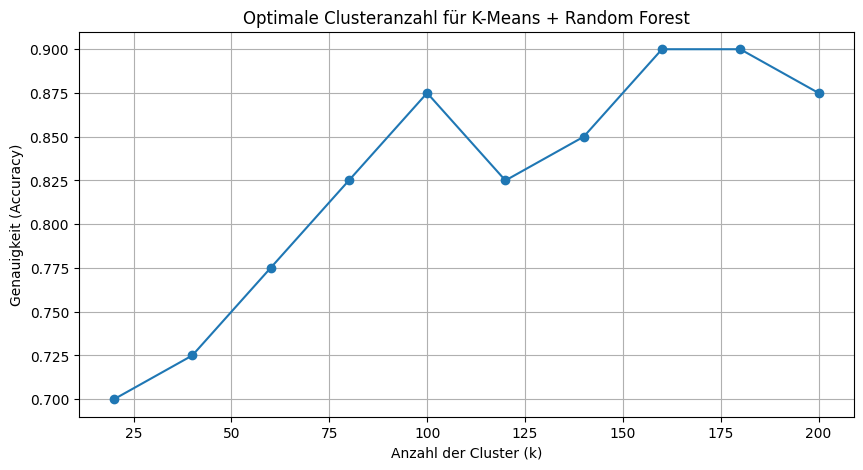


 Bestes k: 160 mit Accuracy: 0.9000


In [20]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Werte f√ºr k testen (von 20 bis 200 in 20er-Schritten)
k_values = range(20, 201, 20)
accuracy_scores = []

for k in k_values:
    # 1Ô∏è K-Means mit k Clustern trainieren
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)

    # 2Ô∏è Transformation der Features durch K-Means (Distanzen zu den Cluster-Zentren)
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced = kmeans.transform(X_val_pca)

    # 3Ô∏è Random Forest trainieren
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model.fit(X_train_reduced, y_train)

    # 4Ô∏è Modellbewertung auf dem Validierungsset
    y_pred = rf_model.predict(X_val_reduced)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

    print(f" k={k} ‚Üí Accuracy: {accuracy:.4f}")

#  Plot der Accuracy in Abh√§ngigkeit von k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="-")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("Genauigkeit (Accuracy)")
plt.title("Optimale Clusteranzahl f√ºr K-Means + Random Forest")
plt.grid(True)
plt.show()

# Bestes k finden
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"\n Bestes k: {best_k} mit Accuracy: {best_accuracy:.4f}")
